# 案例：hive分区表添加字段问题

## 1 问题

在开发过程中，向hive分区表新增字段，发现查询新增字段的值为NULL

## 2 问题复现

In [ ]:
## 创建分区表
CREATE TABLE testtmp.denglg(
    c1 string, 
    c2 string
)
PARTITIONED BY (step string);

# 插入数据
insert into table testtmp.denglg partition(step='1') select'1','2' from default.dual;
insert into table testtmp.denglg partition(step='2') select'11','22' from default.dual;

# 查看数据
select * from testtmp.denglg where step in ('1', '2');

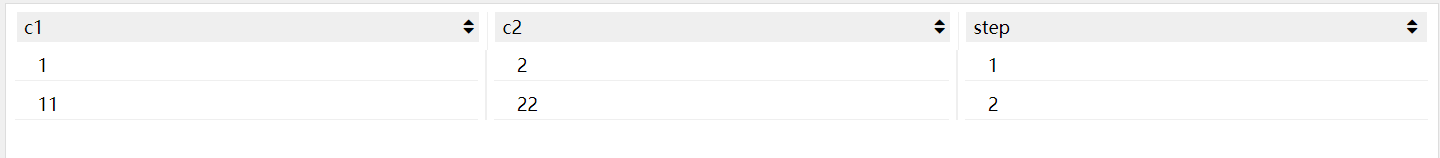

In [ ]:
# 新增字段c3
alter table testtmp.denglg add columns(c3 string);

# 向三个分区插入数据
insert into table testtmp.denglg partition(step='1') select '1','2','3' from default.dual;
insert into table testtmp.denglg partition(step='2') select '11','22','33' from default.dual;
insert into table testtmp.denglg partition(step='3') select '111','222','333' from default.dual;

# 查看数据
select * from testtmp.denglg where step in ('1', '2', '3');

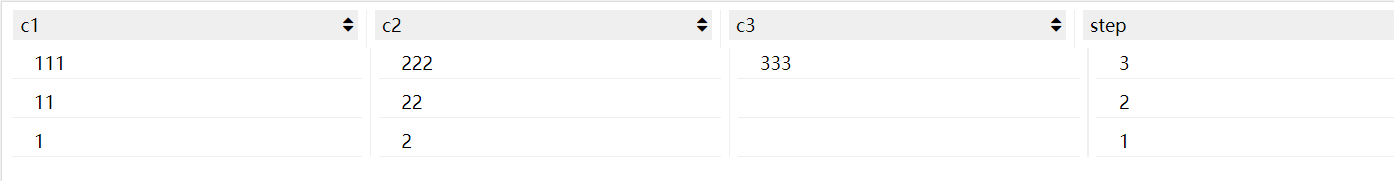

## 3 结论

- 分区在增加字段前存在，会出现查询新增字段值为NULL的情况

- 分区在增加字段前不存在，正常

## 4 解决办法

对于在增加字段前已经存在的分区，必须再执行

In [ ]:
# 对已存在的分区增加新字段
alter table testtmp.denglg partition(step='1') add columns(c3 string);